In [6]:
%matplotlib inline

In [7]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

import tensorflow as tf
import pickle
import os
import random
import glob
import sys
import datetime
import wispy
import wispy.resnet
import wispy.logger
import wispy.utils
import wispy.callbacks
import wispy.model_utils
from tomlkit import parse
from tensorflow.keras.utils import get_custom_objects
import pugna.activations

plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [153]:
sys.path.append("../")

In [155]:
import data_generation_coprec

In [8]:
%matplotlib inline

In [9]:
!ls training_data

alpha.npy   amp_22.npy	coords.npy  phi_21.npy	times.npy
amp_21.npy  beta.npy	gamma.npy   phi_22.npy


In [11]:
times = np.load("training_data/times.npy")

In [10]:
phi_22 = np.load("training_data/phi_22.npy")

In [47]:
phi_21 = np.load("training_data/phi_21.npy")

In [54]:
val_phi_22 = np.load("validation_data/phi_22.npy")

In [55]:
val_phi_21 = np.load("validation_data/phi_21.npy")

In [77]:
amp_22 = np.load("training_data/amp_22.npy")

In [78]:
amp_21 = np.load("training_data/amp_21.npy")

In [79]:
val_amp_22 = np.load("validation_data/amp_22.npy")

In [80]:
val_amp_21 = np.load("validation_data/amp_21.npy")

In [118]:
alpha = np.load("training_data/alpha.npy")

In [119]:
val_alpha = np.load("validation_data/alpha.npy")

In [120]:
beta = np.load("training_data/beta.npy")

In [121]:
val_beta = np.load("validation_data/beta.npy")

In [122]:
gamma = np.load("training_data/gamma.npy")

In [123]:
val_gamma = np.load("validation_data/gamma.npy")

In [89]:
coords = np.load("training_data/coords.npy")

In [92]:
import phenom

In [95]:
etas = phenom.eta_from_q(coords[0])

In [91]:
coords.shape

(7, 100000)

In [59]:
preproc = np.load("pre_processing/preprocessing_params.npz")

In [60]:
dict(preproc)

{'alpha': array(38.1191792),
 'amp_21': array(0.09817156),
 'amp_22': array(0.40015562),
 'beta': array(1.92363344),
 'gamma': array(35.29905606),
 'phi_21': array(99.95753122),
 'phi_22': array(166.98851236)}

In [12]:
phi_22.shape

(100000, 1219)

In [46]:
times.shape

(1219,)

# phi

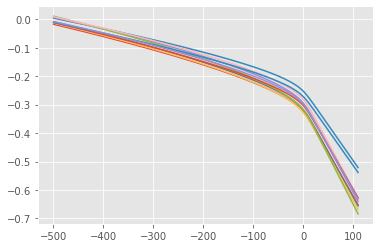

In [114]:
plt.figure()
for i in random.sample(range(len(phi_22)), 10):
    plt.plot(times, phi_22[i]/preproc['phi_22'])
# plt.xlim(108,110)

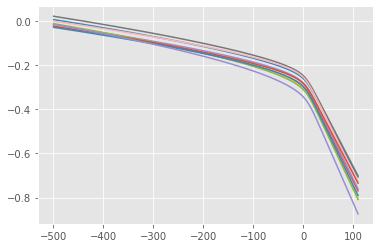

In [115]:
plt.figure()
for i in random.sample(range(len(phi_21)), 10):
    plt.plot(times, phi_21[i]/preproc['phi_21'])
# plt.xlim(108,110)

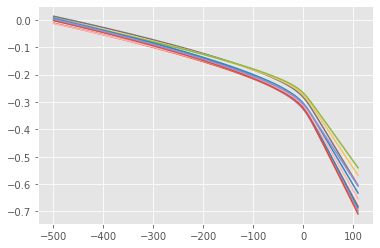

In [71]:
plt.figure()
for i in random.sample(range(len(val_phi_22)), 10):
    plt.plot(times, val_phi_22[i]/preproc['phi_22'])
# plt.xlim(108,110)

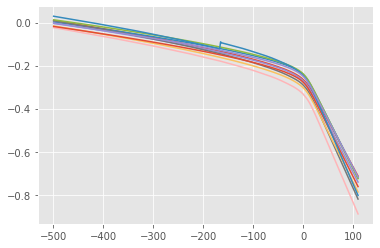

In [67]:
plt.figure()
for i in random.sample(range(len(val_phi_21)), 10):
    plt.plot(times, val_phi_21[i]/preproc['phi_21'])
# plt.xlim(108,110)

# amp

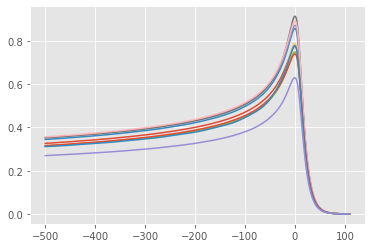

In [110]:
plt.figure()
for i in random.sample(range(len(amp_22)), 10):
#     plt.plot(times, amp_22[i]/preproc['amp_22']/etas[i])
    plt.plot(times, amp_22[i]/preproc['amp_22'])
# plt.xlim(108,110)

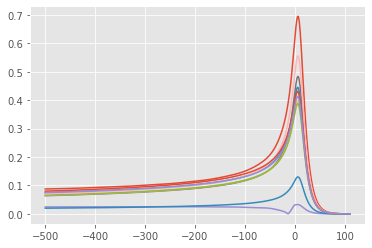

In [111]:
plt.figure()
for i in random.sample(range(len(amp_21)), 10):
    plt.plot(times, amp_21[i]/preproc['amp_21'])
#     plt.plot(times, amp_21[i])
# plt.xlim(108,110)

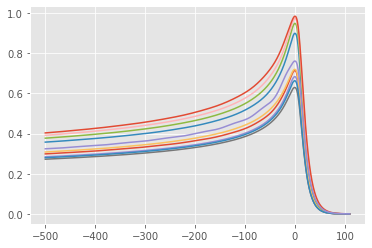

In [108]:
plt.figure()
for i in random.sample(range(len(val_amp_22)), 10):
    plt.plot(times, val_amp_22[i]/preproc['amp_22'])
    #     plt.plot(times, val_amp_22[i]/preproc['amp_22']/etas[i])
# plt.xlim(108,110)

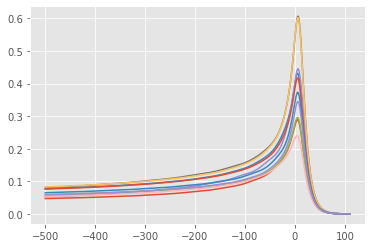

In [109]:
plt.figure()
for i in random.sample(range(len(val_amp_21)), 10):
    plt.plot(times, val_amp_21[i]/preproc['amp_21'])
# plt.xlim(108,110)

# angles

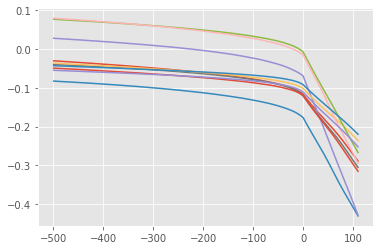

In [124]:
plt.figure()
for i in random.sample(range(len(alpha)), 10):
    plt.plot(times, alpha[i]/preproc['alpha'])
# plt.xlim(108,110)

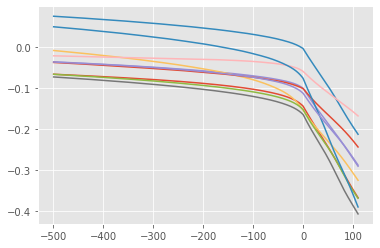

In [143]:
plt.figure()
for i in random.sample(range(len(val_alpha)), 10):
    plt.plot(times, val_alpha[i]/preproc['alpha'])
# plt.xlim(-100,100)

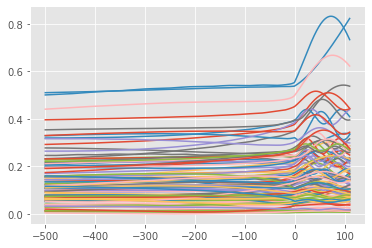

In [150]:
plt.figure()
for i in random.sample(range(len(beta)), 100):
    plt.plot(times, beta[i]/preproc['beta'])
# plt.xlim(-100,100)

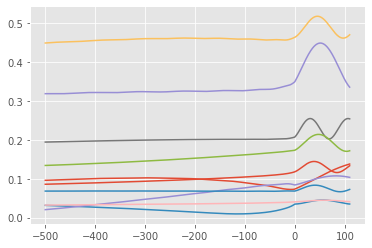

In [145]:
plt.figure()
for i in random.sample(range(len(val_beta)), 10):
    plt.plot(times, val_beta[i]/preproc['beta'])
# plt.xlim(108,110)

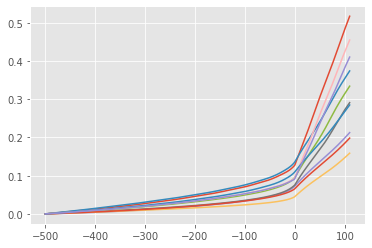

In [146]:
plt.figure()
for i in random.sample(range(len(gamma)), 10):
    plt.plot(times, gamma[i]/preproc['gamma'])
# plt.xlim(108,110)

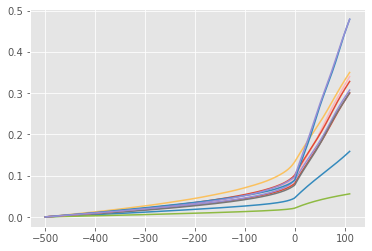

In [147]:
plt.figure()
for i in random.sample(range(len(val_gamma)), 10):
    plt.plot(times, val_gamma[i]/preproc['gamma'])
# plt.xlim(108,110)

# trying to scale beta using some physics

In [ ]:
# idea: subtract off the computed thetaJN 
# it seems to reduce the spread of the beta data around merger

In [152]:
coords.T[0]

array([1.81120854, 0.98411444, 0.55017115, 1.00117474, 0.65215541,
       1.32439825, 4.59260837])

In [158]:
Mtot = 100

In [160]:
m1, m2 = phenom.m1_m2_M_q(Mtot, coords[0])

In [161]:
coords[1]

array([0.98411444, 0.77184339, 0.31877174, ..., 0.67607596, 0.97774966,
       0.54911117])

In [165]:
s1x, s1y, s1z = data_generation_coprec.polar_to_cart(coords[1], coords[2], coords[3])

In [168]:
s2x, s2y, s2z = data_generation_coprec.polar_to_cart(coords[4], coords[5], coords[6])

In [169]:
p = {}
p["m1"] = m1
p["m2"] = m2
p["f_min"] = 10.
p["phiRef"] = 0.
p["S1x"] = s1x
p["S1y"] = s1y
p["S1z"] = s1z
p["S2x"] = s2x
p["S2y"] = s2y
p["S2z"] = s2z

In [200]:
thetaJNs = []
alpha0s = []
for i in range(len(coords[0])):
    thetaJN, alpha0, phi_aligned = wispy.rotations.compute_L_to_J_angles(
        mass1=p["m1"][i],
        mass2=p["m2"][i],
        f_ref=p["f_min"],
        inc=0,
        phiref=p["phiRef"],
        spin1x=p["S1x"][i],
        spin1y=p["S1y"][i],
        spin1z=p["S1z"][i],
        spin2x=p["S2x"][i],
        spin2y=p["S2y"][i],
        spin2z=p["S2z"][i],
    )
    thetaJNs.append(thetaJN)
    alpha0s.append(alpha0)
thetaJNs = np.array(thetaJNs)
alpha0s = np.array(alpha0s)

In [189]:
thetaJNs[0]

0.10476279594508751

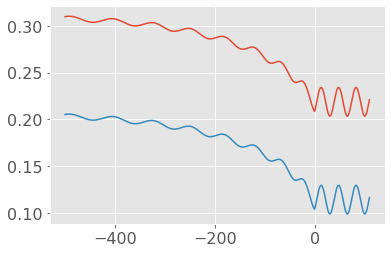

In [190]:
plt.figure()
plt.plot(times, beta[0])
plt.plot(times, beta[0]-thetaJNs[0])

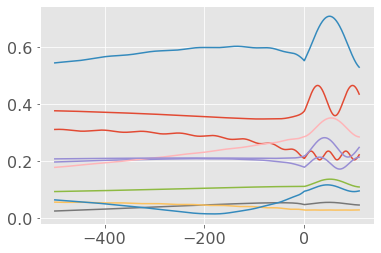

In [191]:
plt.figure()
for i in range(10):
    plt.plot(times, beta[i])


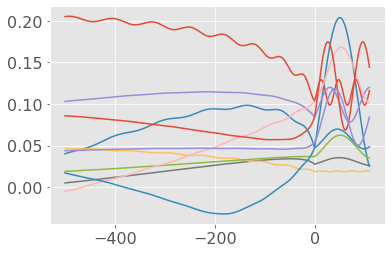

In [192]:
plt.figure()
for i in range(10):
    plt.plot(times, beta[i]-thetaJNs[i])

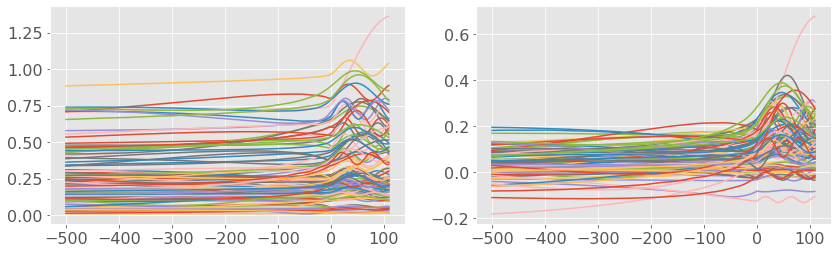

In [202]:
plt.figure(figsize=(14, 4))
for i in random.sample(range(len(beta)), 100):
    plt.subplot(1, 2, 1)
    plt.plot(times, beta[i])
    
    plt.subplot(1, 2, 2)
    plt.plot(times, beta[i]-thetaJNs[i])